<font color="#CC3D3D"><p>
# 06. 토픽 모델링(NMF, LDA, SBERT)

<font color="#green"><p>
## NMF

### Non-negative Matrix Factorization

- 한 행렬 X를 두 행렬 Z와 W의 곱으로 나타냄(factorization)

- 이 떄 Z와 W의 값은 모두 음수가 아니어야 함(non-negative)

### 토픽 모델링으로서 NMF

- 문서 단어 행렬을 NMF할 경우 다음과 같이 해석

- Z는 각 문서 토픽

- W는 토픽별 단어 빈도

- SVD와 비슷하지만 해석이 좀 더 쉬운 편(음수가 나오지 않으므로)

### NMF 실습

- 전처리는 SVD와 동일
- 차원(=토픽의 수)를 결정하기 위해 SVD로 스크리 플롯을 그려본다

- - -

파일 불러오기 및 전처리

In [16]:
#mac 환경
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')

#마이너스 부호 설정
plt.rcParams['axes.unicode_minus'] = False

In [11]:
import kiwipiepy
kiwi = kiwipiepy.Kiwi() 
def extract_nouns(text):
    for token in kiwi.tokenize(text):
        if token.tag in {'NNG', 'NNP'}:
            yield token.form

In [12]:
import pandas as pd
df = pd.read_excel('data/patents.xlsx')

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer= extract_nouns, min_df=10) #min_df : 최소 문서수
dtm = cv.fit_transform(df.abstract)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=14, random_state=1234)
doc_emb = svd.fit_transform(dtm)

- - -

In [15]:
from sklearn.decomposition import NMF
NUM_TOPICS = 14
nmf = NMF(n_components= NUM_TOPICS)
doc_emb = nmf.fit_transform(dtm)
word_emb = nmf.components_.T

### 단어 임베딩

- NMF는 SVD와 달리 회전을 하지 않아도 단어는 소수의 토픽과 관련을 가짐

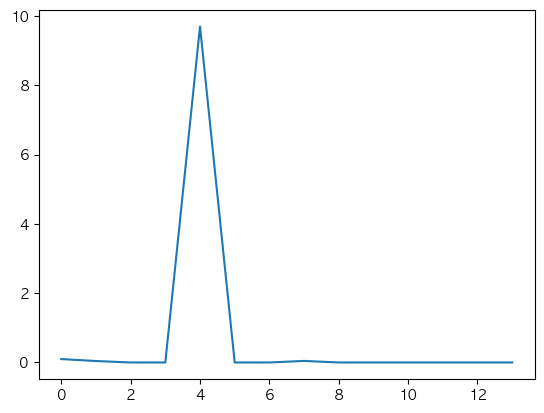

In [17]:
words = cv.get_feature_names_out().tolist()
i = words.index('모발')
plt.plot(word_emb[i])